# IMPORTY

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
import plotly.express as px
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# DataSet

In [5]:
df = pd.read_csv("Students Performance Dataset.csv")
df

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,CS,96.09,45.86,45.63,...,51.66,53.5470,F,7.8,No,No,Master's,Medium,10,4.5
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Mathematics,96.30,78.67,47.42,...,52.33,59.0240,F,24.2,No,Yes,NaN,Medium,4,7.2
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,89.94,50.84,65.83,...,97.89,74.7560,C,7.6,No,Yes,NaN,High,5,6.6
4998,S5998,Sara,Davis,student4998@university.com,Male,23,Engineering,99.09,55.44,57.45,...,84.74,68.6585,D,14.5,Yes,No,PhD,Medium,10,5.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [7]:
df.Parent_Education_Level = df.Parent_Education_Level.fillna("None")
df = df.dropna()

In [8]:
df.isna().sum()

Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [10]:
df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,21.048400,75.356076,70.701924,69.546552,74.956320,74.836214,49.963720,74.78305,71.652097,17.521140,5.507200,6.514420
std,1.989786,14.392716,17.436325,17.108996,14.404287,14.423848,28.989785,14.54243,7.230097,7.193035,2.886662,1.446155
min,18.000000,50.010000,40.000000,40.010000,50.000000,50.000000,0.000000,50.00000,50.602000,5.000000,1.000000,4.000000
25%,19.000000,62.945000,55.707500,54.697500,62.340000,62.357500,25.075000,61.97000,66.533875,11.500000,3.000000,5.300000
50%,21.000000,75.670000,70.860000,69.485000,75.090000,74.905000,49.600000,74.54000,71.696250,17.400000,6.000000,6.500000
75%,23.000000,87.862500,85.760000,83.922500,87.352500,87.292500,75.500000,87.63000,76.711625,23.700000,8.000000,7.800000
max,24.000000,100.000000,99.990000,99.980000,99.990000,99.990000,100.000000,100.00000,95.091500,30.000000,10.000000,9.000000


In [11]:
df.head(5)

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


In [12]:
df = df.drop(['First_Name','Last_Name','Email','Student_ID'], axis =1)

In [13]:
df.head(5)

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Mathematics,97.36,40.61,59.61,73.69,53.17,73.4,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,Male,18,Business,97.71,57.27,74.00,74.23,98.23,88.0,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,Male,24,Engineering,99.52,41.84,63.85,85.85,50.00,4.7,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,Female,24,Engineering,90.38,45.65,44.44,68.10,66.27,4.2,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,Female,23,CS,59.41,53.13,61.77,67.66,83.98,64.3,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


In [14]:
for col in df.columns:
    print(f"\n=== KOLUMNA: {col} ===")
    print(df[col].unique())


=== KOLUMNA: Gender ===
['Female' 'Male']

=== KOLUMNA: Age ===
[22 18 24 23 21 19 20]

=== KOLUMNA: Department ===
['Mathematics' 'Business' 'Engineering' 'CS']

=== KOLUMNA: Attendance (%) ===
[97.36 97.71 99.52 ... 85.66 76.77 90.33]

=== KOLUMNA: Midterm_Score ===
[40.61 57.27 41.84 ... 81.67 55.44 93.29]

=== KOLUMNA: Final_Score ===
[59.61 74.   63.85 ... 65.83 57.45 88.42]

=== KOLUMNA: Assignments_Avg ===
[73.69 74.23 85.85 ... 56.41 57.89 84.69]

=== KOLUMNA: Quizzes_Avg ===
[53.17 98.23 50.   ... 65.11 69.89 65.22]

=== KOLUMNA: Participation_Score ===
[ 73.4  88.    4.7   4.2  64.3  54.8  15.5  97.4  63.1  44.9  82.8  21.3
  41.4  52.8  50.5  92.1  29.3   5.7  91.6  21.7  37.9  53.1  97.6  53.5
  44.8  58.4  97.1  81.8  16.9  80.3  84.1  69.1  65.7  44.1  64.2  73.8
  12.3  25.7  19.4  68.   45.1  82.6  71.7  91.4   7.7  50.9  70.7  20.7
  32.7  41.9  79.4  49.4  49.3  43.1  22.9  92.3  31.8  56.7  14.9  43.4
  90.4  99.5  36.2  15.4  31.4  64.5  49.6  76.8  70.1  25.1  78.

In [15]:
dfasocj=df.copy()

In [323]:
'''# ===== UZUPEŁNIANIE NANS =====
df['Gender'] = df['Gender'].fillna('Female')
df['Department'] = df['Department'].fillna('CS')
df['Grade'] = df['Grade'].fillna('F')
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].fillna('No')
df['Internet_Access_at_Home'] = df['Internet_Access_at_Home'].fillna('No')
df['Parent_Education_Level'] = df['Parent_Education_Level'].fillna("High School")
df['Family_Income_Level'] = df['Family_Income_Level'].fillna('Medium')'''

data_org = df.copy()

# ===== MAPOWANIA KOLUMN KATEGORIALNYCH =====
map_gender = {'Female': 0, 'Male': 1}
map_department = {'Mathematics': 0, 'Business': 1, 'Engineering': 2, 'CS': 3}
map_grade = {'F': 1, 'D': 2, 'C': 3, 'B': 4, 'A': 5}#brak E
map_extracurricular = {'No': 0, 'Yes': 1}
map_internet = {'No': 0, 'Yes': 1}
#map_parent_edu = {"High School": 0, "Master's": 1, "Bachelor's": 2, "PhD": 3}
map_parent_edu = {"None": 0,"High School": 1, "Master's": 2, "Bachelor's": 3, "PhD": 4}
map_income = {'Low': 0, 'Medium': 1, 'High': 2}

# ===== MAPOWANIE KOLUMN =====
df['Gender'] = df['Gender'].map(map_gender)
df['Department'] = df['Department'].map(map_department)
df['Grade'] = df['Grade'].map(map_grade)
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map(map_extracurricular)
df['Internet_Access_at_Home'] = df['Internet_Access_at_Home'].map(map_internet)
df['Parent_Education_Level'] = df['Parent_Education_Level'].map(map_parent_edu)
df['Family_Income_Level'] = df['Family_Income_Level'].map(map_income)


In [324]:
df.head(5)

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,0,22,0,97.36,40.61,59.61,73.69,53.17,73.4,62.84,59.8865,1,10.3,1,0,2,1,1,5.9
1,1,18,1,97.71,57.27,74.00,74.23,98.23,88.0,98.23,81.9170,4,27.1,0,0,1,0,4,4.3
2,1,24,2,99.52,41.84,63.85,85.85,50.00,4.7,91.22,67.7170,2,12.4,1,0,1,0,9,6.1
3,0,24,2,90.38,45.65,44.44,68.10,66.27,4.2,55.48,51.6535,1,25.5,0,1,1,0,8,4.9
4,0,23,3,59.41,53.13,61.77,67.66,83.98,64.3,87.43,71.4030,3,13.3,1,0,2,1,6,4.5


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      5000 non-null   int64  
 1   Age                         5000 non-null   int64  
 2   Department                  5000 non-null   int64  
 3   Attendance (%)              5000 non-null   float64
 4   Midterm_Score               5000 non-null   float64
 5   Final_Score                 5000 non-null   float64
 6   Assignments_Avg             5000 non-null   float64
 7   Quizzes_Avg                 5000 non-null   float64
 8   Participation_Score         5000 non-null   float64
 9   Projects_Score              5000 non-null   float64
 10  Total_Score                 5000 non-null   float64
 11  Grade                       5000 non-null   int64  
 12  Study_Hours_per_Week        5000 non-null   float64
 13  Extracurricular_Activities  5000 

In [326]:
df.describe()

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.510200,21.048400,1.505800,75.356076,70.701924,69.546552,74.956320,74.836214,49.963720,74.78305,71.652097,2.670400,17.521140,0.502400,0.504000,2.010200,0.990400,5.507200,6.514420
std,0.499946,1.989786,1.111312,14.392716,17.436325,17.108996,14.404287,14.423848,28.989785,14.54243,7.230097,0.779157,7.193035,0.500044,0.500034,1.422146,0.815623,2.886662,1.446155
min,0.000000,18.000000,0.000000,50.010000,40.000000,40.010000,50.000000,50.000000,0.000000,50.00000,50.602000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
25%,0.000000,19.000000,1.000000,62.945000,55.707500,54.697500,62.340000,62.357500,25.075000,61.97000,66.533875,2.000000,11.500000,0.000000,0.000000,1.000000,0.000000,3.000000,5.300000
50%,1.000000,21.000000,2.000000,75.670000,70.860000,69.485000,75.090000,74.905000,49.600000,74.54000,71.696250,3.000000,17.400000,1.000000,1.000000,2.000000,1.000000,6.000000,6.500000
75%,1.000000,23.000000,2.000000,87.862500,85.760000,83.922500,87.352500,87.292500,75.500000,87.63000,76.711625,3.000000,23.700000,1.000000,1.000000,3.000000,2.000000,8.000000,7.800000
max,1.000000,24.000000,3.000000,100.000000,99.990000,99.980000,99.990000,99.990000,100.000000,100.00000,95.091500,5.000000,30.000000,1.000000,1.000000,4.000000,2.000000,10.000000,9.000000


In [327]:
df.Parent_Education_Level.unique()

array([2, 1, 0, 3, 4])

In [328]:
for column in df.columns:
    df[column] = df[column].astype(float)

df_scal = StandardScaler().set_output(transform="pandas").fit_transform(df)

In [329]:
df_scal.head(5)

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,-1.020612,0.478290,-1.355111,1.528977,-1.725991,-0.580837,-0.087922,-1.502261,0.808513,-0.821338,-1.627471,-2.144071,-1.004008,0.995211,-1.008032,-0.007173,0.011771,-1.561545,-0.424907
1,0.979804,-1.532177,-0.455183,1.553297,-0.770419,0.260325,-0.050429,1.622045,1.312189,1.612474,1.419888,1.706631,1.331819,-1.004812,-1.008032,-0.710406,-1.214408,-0.522178,-1.531400
2,0.979804,1.483524,0.444744,1.679067,-1.655441,-0.332990,0.756356,-1.722058,-1.561524,1.130388,-0.544321,-0.860503,-0.712029,0.995211,-1.008032,-0.710406,-1.214408,1.210100,-0.286595
3,-1.020612,1.483524,0.444744,1.043960,-1.436910,-1.467594,-0.476039,-0.593952,-1.578773,-1.327493,-2.766297,-2.144071,1.109359,-1.004812,0.992032,-0.710406,-1.214408,0.863644,-1.116465
4,-1.020612,0.980907,1.344672,-1.108038,-1.007878,-0.454575,-0.506589,0.633999,0.494578,0.869746,-0.034456,0.423064,-0.586896,0.995211,-1.008032,-0.007173,0.011771,0.170733,-1.393088


In [330]:
df_scal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      5000 non-null   float64
 1   Age                         5000 non-null   float64
 2   Department                  5000 non-null   float64
 3   Attendance (%)              5000 non-null   float64
 4   Midterm_Score               5000 non-null   float64
 5   Final_Score                 5000 non-null   float64
 6   Assignments_Avg             5000 non-null   float64
 7   Quizzes_Avg                 5000 non-null   float64
 8   Participation_Score         5000 non-null   float64
 9   Projects_Score              5000 non-null   float64
 10  Total_Score                 5000 non-null   float64
 11  Grade                       5000 non-null   float64
 12  Study_Hours_per_Week        5000 non-null   float64
 13  Extracurricular_Activities  5000 

# TEST KMO i Sferyczny

Test KMO

In [331]:
#test KMO
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df_scal)
print(kmo_all)
print("=========================================================")
print(kmo_model)

[0.50808902 0.47586626 0.51623421 0.50055199 0.30649895 0.3935392
 0.36678209 0.34820223 0.28683271 0.39297266 0.43927585 0.44307874
 0.46194469 0.49863047 0.47929881 0.49957429 0.47010076 0.54218847
 0.55110455]
0.414917537295276


C:\Users\wgrzy\miniconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Test KMO poniżej 0.5 --> nie ma wskazań do FA

Test Bartletta

In [332]:
#test Bartletta
from factor_analyzer import calculate_bartlett_sphericity
chi2, p = calculate_bartlett_sphericity(df_scal)
print(f"CHI2 = {chi2}")
print(f"p = {p}") #jeśli <0.05 to przyjmujemy

CHI2 = nan
p = nan


C:\Users\wgrzy\miniconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


Jeśli p<0.05 wynik istotny statystycznie i mamy korelacje cząstkowe, potrzebne do przeprowadzenia FA, jednak uwzględniając niski wynik testu KMO, nie wykonamy FA i przejdziemy do redukcji wymiarów metodą PCA

In [333]:
df_scal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      5000 non-null   float64
 1   Age                         5000 non-null   float64
 2   Department                  5000 non-null   float64
 3   Attendance (%)              5000 non-null   float64
 4   Midterm_Score               5000 non-null   float64
 5   Final_Score                 5000 non-null   float64
 6   Assignments_Avg             5000 non-null   float64
 7   Quizzes_Avg                 5000 non-null   float64
 8   Participation_Score         5000 non-null   float64
 9   Projects_Score              5000 non-null   float64
 10  Total_Score                 5000 non-null   float64
 11  Grade                       5000 non-null   float64
 12  Study_Hours_per_Week        5000 non-null   float64
 13  Extracurricular_Activities  5000 

# ROZKŁAD PCA - Dobór składowych głównych

Rozkład na wartości własne i wektory własne

In [334]:
eig_vals, eig_vecs = np.linalg.eig(df_scal.cov())
total_var = df_scal.var().sum()
print("Wariancja całkowita: ", total_var)

Wariancja całkowita:  19.003800760152178


In [335]:
eig_vals_sum = eig_vals.sum()
print("Suma wartości własnych: ", eig_vals_sum)

Suma wartości własnych:  19.00380076015204


In [336]:
np.set_printoptions(suppress=True) # brak notacji naukowej
var_exp = eig_vals/total_var
print("Proporcja wariancji wyjaśnionej przez każdą składową: \n", var_exp)

Proporcja wariancji wyjaśnionej przez każdą składową: 
 [ 0.1523122   0.00503079 -0.          0.05803078  0.05746894  0.05630362
  0.04737391  0.04865338  0.04901859  0.05552663  0.05489535  0.04983622
  0.0504068   0.05075048  0.05417418  0.05187977  0.05237275  0.0531345
  0.05283113]


Wykres osypiska

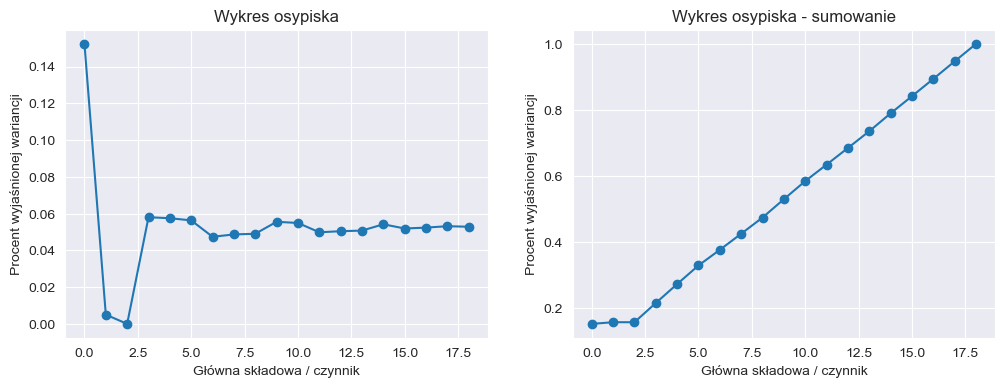

In [337]:
#Wykres osypiska

fig, ax = plt.subplots(1,2, figsize = (12,4))

ax[0].plot(
    var_exp,
    marker="o",
)
ax[0].set_xlabel("Główna składowa / czynnik")
ax[0].set_ylabel("Procent wyjaśnionej wariancji")
ax[0].set_title("Wykres osypiska")

ax[1].plot(
    np.cumsum(var_exp),
    marker="o",
)
ax[1].set_xlabel("Główna składowa / czynnik")
ax[1].set_ylabel("Procent wyjaśnionej wariancji")
ax[1].set_title("Wykres osypiska - sumowanie")

plt.show()


Kryterium procentu wyjaśnionej wariancji

In [338]:
#kryterium wyjaśnionej wariancji
cum_var_exp = np.cumsum(var_exp)
print("Laczna suma wyjasnionej wariancji przy uwzglednieniu kolejnych n czynnikow:\n",cum_var_exp)

Laczna suma wyjasnionej wariancji przy uwzglednieniu kolejnych n czynnikow:
 [0.1523122  0.15734299 0.15734299 0.21537377 0.27284271 0.32914633
 0.37652024 0.42517362 0.47419221 0.52971883 0.58461419 0.6344504
 0.6848572  0.73560767 0.78978186 0.84166163 0.89403437 0.94716887
 1.        ]


Jako że wykres osypiska jest nie regularny, skorzystamy z Kryterium Kaisera, aby wybrać składowe które wyjaśniają najwięcej wariancji.

In [339]:
kaiser_rule = np.where(eig_vals > 1)[0]
print(kaiser_rule)

[ 0  3  4  5  9 10 14 17 18]


Wybieramy 9 składowych

## PCA

In [340]:
n_components = len(kaiser_rule)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(df_scal)
gs_columns = [f'GS{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(X_pca, columns=gs_columns)

df_pca.head()

,GS1,GS2,GS3,GS4,GS5,GS6,GS7,GS8,GS9
0,-3.112482,2.296051,-1.153518,-1.481703,-0.526645,-0.582232,1.174474,-0.758272,1.471943
1,2.572051,-0.493353,-1.768160,-1.369547,-0.777232,-1.788981,-0.347908,-0.055472,-0.446845
2,-1.079315,-0.912547,-0.952360,0.288185,0.044836,-0.816195,3.248097,0.084938,-0.103515
3,-4.434622,-0.956057,0.386436,-0.744049,0.930529,-1.364960,1.429399,-0.909044,-1.320776
4,0.201104,1.384999,-1.094237,0.136804,1.673951,-0.303812,-0.139505,0.961666,-1.040031


In [341]:
print("Ilość wariancji wyjaśnionej przez poszczególne składowe wybrane do PCA według kryterium Kaisera: ",var_exp[kaiser_rule])

Ilość wariancji wyjaśnionej przez poszczególne składowe wybrane do PCA według kryterium Kaisera:  [0.1523122  0.05803078 0.05746894 0.05630362 0.05552663 0.05489535
 0.05417418 0.0531345  0.05283113]


In [342]:
explained_variance_kaiser = var_exp[kaiser_rule].sum()
print("Łączna wyjaśniona wariancja przez składowe wybrane za pomocą Kryterium Kaisera:", explained_variance_kaiser)
print("W procentach:", explained_variance_kaiser*100, "%")

Łączna wyjaśniona wariancja przez składowe wybrane za pomocą Kryterium Kaisera: 0.5946773275640451
W procentach: 59.467732756404516 %


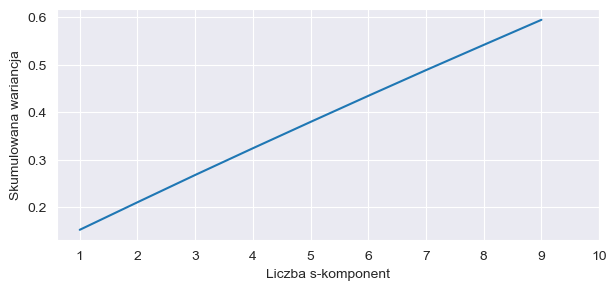

In [343]:
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Liczba s-komponent')
plt.ylabel('Skumulowana wariancja')
plt.xticks(np.arange(0,10,1),np.arange(1,11,1))
plt.gcf().set_size_inches(7,3)

Widzimy, że ilość wariancji, którą wyjaśnia model PCA zlożony z 9 składowych wybranych Kryterium Kaisera wynosi 59,47%, nie jest to zbyt dużym wynikiem dlatego niżej sprawdzamy jak przedstawiał by się model PCA, gdy wybierzemy automatyczny dobór składowych w oparciu o procent wariancji, który chcemy mieć wyjaśniony przez model.
W naszym przypadku zastosujemy 90%

In [344]:
pca2= PCA(svd_solver='full', n_components=0.90)
pc = pca2.fit_transform(df_scal)
gs_columns = [f'GS{i+1}' for i in range(len(pc[0]))]
pc_df = pd.DataFrame(data= pc, columns=gs_columns)
pc_df.head()


,GS1,GS2,GS3,GS4,GS5,GS6,GS7,GS8,GS9,GS10,GS11,GS12,GS13,GS14,GS15,GS16
0,-3.112482,2.296051,-1.153518,-1.481703,-0.526645,-0.582232,1.174474,-0.758272,1.471943,-0.035723,-0.642026,0.650323,0.292806,-0.231551,0.516341,-0.642709
1,2.572051,-0.493353,-1.768160,-1.369547,-0.777232,-1.788981,-0.347908,-0.055472,-0.446845,-0.399456,2.240885,0.596645,0.518864,-1.631825,-1.515536,-0.056918
2,-1.079315,-0.912547,-0.952360,0.288185,0.044836,-0.816195,3.248097,0.084938,-0.103515,0.791846,-0.673774,-0.009226,1.572707,-0.600327,1.025032,-1.986407
3,-4.434622,-0.956057,0.386436,-0.744049,0.930529,-1.364960,1.429399,-0.909044,-1.320776,1.679706,0.516850,-0.566453,-0.542818,0.443721,-0.176475,-0.488157
4,0.201104,1.384999,-1.094237,0.136804,1.673951,-0.303812,-0.139505,0.961666,-1.040031,0.934053,-0.321214,-0.737574,1.119201,-0.811998,0.495703,0.302156


In [345]:
print("Ilość składowych potrzebnych do opisania 90% wariancji: ",len(pc_df.columns))

Ilość składowych potrzebnych do opisania 90% wariancji:  16


In [346]:
print("Ilość wariancji wyjaśnionej przez poszczególne składowe wybrane do PCA: ",pca2.explained_variance_ratio_)

Ilość wariancji wyjaśnionej przez poszczególne składowe wybrane do PCA:  [0.1523122  0.05803078 0.05746894 0.05630362 0.05552663 0.05489535
 0.05417418 0.0531345  0.05283113 0.05237275 0.05187977 0.05075048
 0.0504068  0.04983622 0.04901859 0.04865338]


In [347]:
print("Łączna wyjaśniona wariancja przez składowe (z założenia 90%):", pca2.explained_variance_ratio_.sum())
print("W procentach:", (pca2.explained_variance_ratio_.sum())*100, "%")

Łączna wyjaśniona wariancja przez składowe (z założenia 90%): 0.947595296894324
W procentach: 94.7595296894324 %


## Klasyfikacja - przewidywanie oceny końcowej studentów na bazie ich wyników w trakcie semestru i czynników środowiskowych

Drzewo decyzyjne

Zmieniamy Department z użyciem pd.get_dummies() ponieważ wydziały nie mają ustalonego porządku

In [348]:
df["Department"] = data_org["Department"]
df.head()

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,0.0,22.0,Mathematics,97.36,40.61,59.61,73.69,53.17,73.4,62.84,59.8865,1.0,10.3,1.0,0.0,2.0,1.0,1.0,5.9
1,1.0,18.0,Business,97.71,57.27,74.00,74.23,98.23,88.0,98.23,81.9170,4.0,27.1,0.0,0.0,1.0,0.0,4.0,4.3
2,1.0,24.0,Engineering,99.52,41.84,63.85,85.85,50.00,4.7,91.22,67.7170,2.0,12.4,1.0,0.0,1.0,0.0,9.0,6.1
3,0.0,24.0,Engineering,90.38,45.65,44.44,68.10,66.27,4.2,55.48,51.6535,1.0,25.5,0.0,1.0,1.0,0.0,8.0,4.9
4,0.0,23.0,CS,59.41,53.13,61.77,67.66,83.98,64.3,87.43,71.4030,3.0,13.3,1.0,0.0,2.0,1.0,6.0,4.5


In [349]:
X_dummy = pd.get_dummies(df[['Department']], drop_first=True)
X_dummy.head()

,Department_CS,Department_Engineering,Department_Mathematics
0,False,False,True
1,False,False,False
2,False,True,False
3,False,True,False
4,True,False,False


In [350]:
y = df["Grade"]
X = df.drop(["Grade","Total_Score", "Department"], axis=1)
X = pd.concat([X_dummy,X], axis=1)

X.head()

,Department_CS,Department_Engineering,Department_Mathematics,Gender,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,False,False,True,0.0,22.0,97.36,40.61,59.61,73.69,53.17,73.4,62.84,10.3,1.0,0.0,2.0,1.0,1.0,5.9
1,False,False,False,1.0,18.0,97.71,57.27,74.00,74.23,98.23,88.0,98.23,27.1,0.0,0.0,1.0,0.0,4.0,4.3
2,False,True,False,1.0,24.0,99.52,41.84,63.85,85.85,50.00,4.7,91.22,12.4,1.0,0.0,1.0,0.0,9.0,6.1
3,False,True,False,0.0,24.0,90.38,45.65,44.44,68.10,66.27,4.2,55.48,25.5,0.0,1.0,1.0,0.0,8.0,4.9
4,True,False,False,0.0,23.0,59.41,53.13,61.77,67.66,83.98,64.3,87.43,13.3,1.0,0.0,2.0,1.0,6.0,4.5


In [351]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Department_CS               5000 non-null   bool   
 1   Department_Engineering      5000 non-null   bool   
 2   Department_Mathematics      5000 non-null   bool   
 3   Gender                      5000 non-null   float64
 4   Age                         5000 non-null   float64
 5   Attendance (%)              5000 non-null   float64
 6   Midterm_Score               5000 non-null   float64
 7   Final_Score                 5000 non-null   float64
 8   Assignments_Avg             5000 non-null   float64
 9   Quizzes_Avg                 5000 non-null   float64
 10  Participation_Score         5000 non-null   float64
 11  Projects_Score              5000 non-null   float64
 12  Study_Hours_per_Week        5000 non-null   float64
 13  Extracurricular_Activities  5000 

In [352]:
bool_cols = X.select_dtypes(include="bool").columns
X[bool_cols] = X[bool_cols].astype(float)

X.head()

,Department_CS,Department_Engineering,Department_Mathematics,Gender,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,0.0,0.0,1.0,0.0,22.0,97.36,40.61,59.61,73.69,53.17,73.4,62.84,10.3,1.0,0.0,2.0,1.0,1.0,5.9
1,0.0,0.0,0.0,1.0,18.0,97.71,57.27,74.00,74.23,98.23,88.0,98.23,27.1,0.0,0.0,1.0,0.0,4.0,4.3
2,0.0,1.0,0.0,1.0,24.0,99.52,41.84,63.85,85.85,50.00,4.7,91.22,12.4,1.0,0.0,1.0,0.0,9.0,6.1
3,0.0,1.0,0.0,0.0,24.0,90.38,45.65,44.44,68.10,66.27,4.2,55.48,25.5,0.0,1.0,1.0,0.0,8.0,4.9
4,1.0,0.0,0.0,0.0,23.0,59.41,53.13,61.77,67.66,83.98,64.3,87.43,13.3,1.0,0.0,2.0,1.0,6.0,4.5


Podział na zbiory treningowe i testowe

In [353]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

Znalezienie najlepszych parametrów poprzez GridSearch

In [354]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 10,12,15,20],
    "min_samples_split": [2, 5, 10,20],
    "min_samples_leaf": [1, 2, 5]
}

dt = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [355]:
best_model = grid.best_estimator_

print("Najlepsze parametry:")
print(grid.best_params_)


Najlepsze parametry:
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 2}


Wyniki i wizualizacje dla najlepszego modelu

In [356]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")

print("Classification report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7650

Classification report:
              precision    recall  f1-score   support

         1.0       0.66      0.62      0.64        56
         2.0       0.78      0.75      0.76       352
         3.0       0.77      0.83      0.80       461
         4.0       0.75      0.64      0.69       128
         5.0       0.50      0.33      0.40         3

    accuracy                           0.77      1000
   macro avg       0.69      0.64      0.66      1000
weighted avg       0.76      0.77      0.76      1000



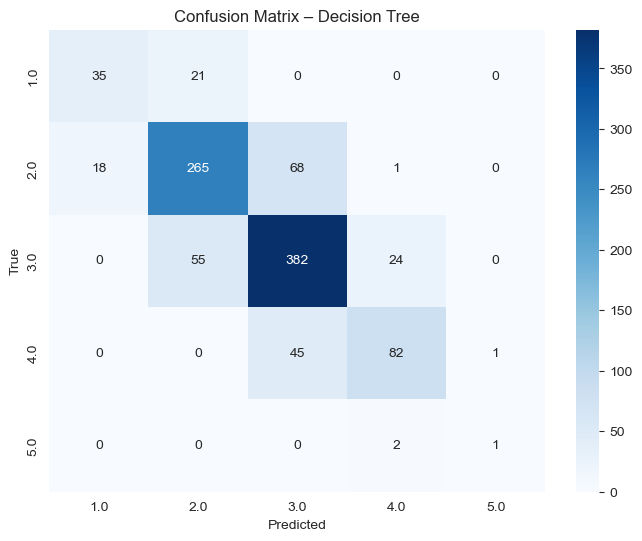

In [357]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=sorted(y.unique()),
    yticklabels=sorted(y.unique())
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – Decision Tree")
plt.show()


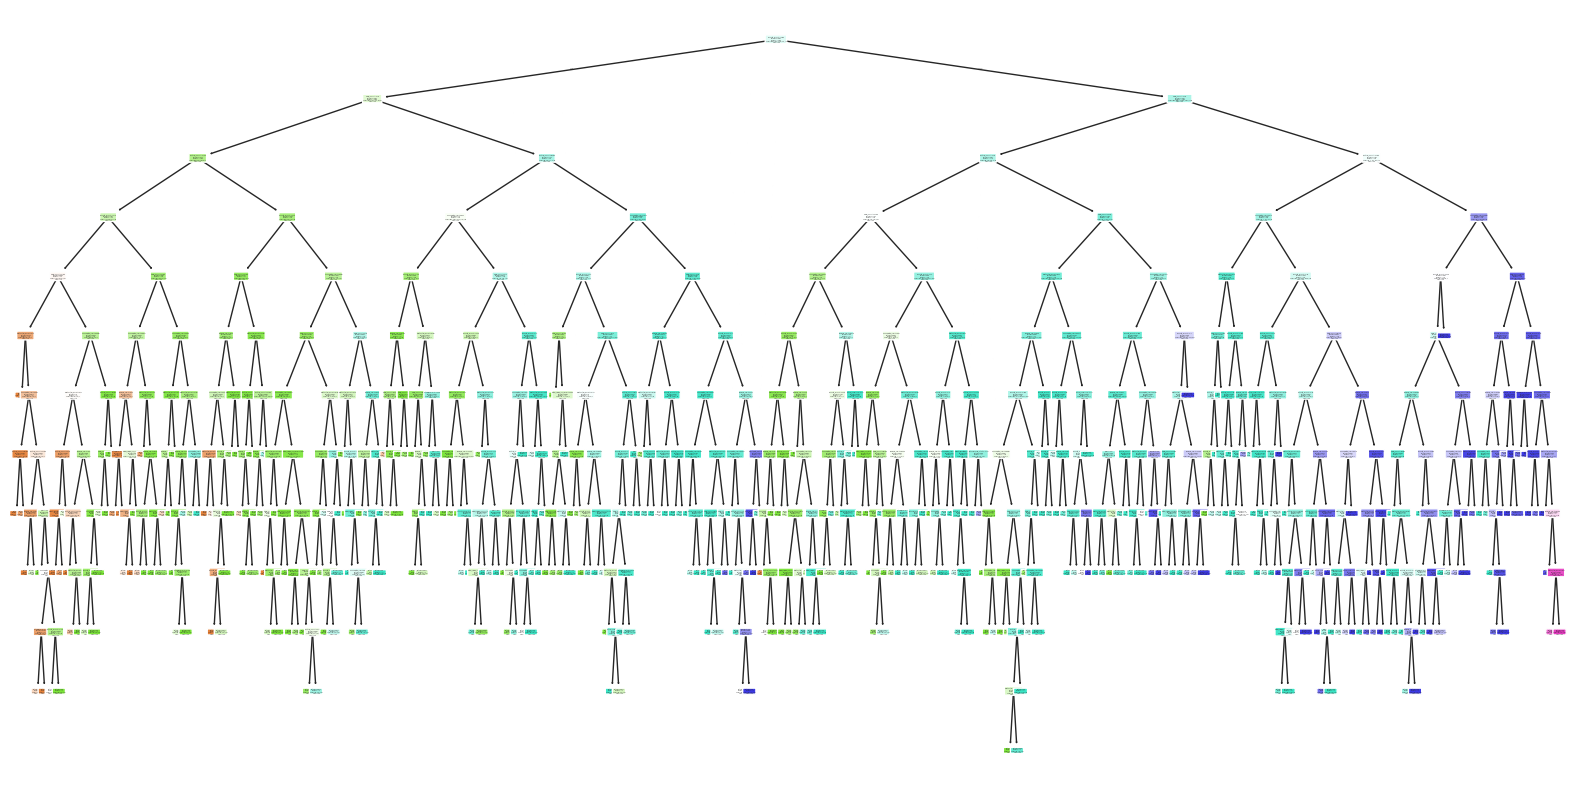

In [358]:
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=[str(c) for c in sorted(y.unique())],
    filled=True,
    rounded=True
)
plt.show()


Analiza overfittingu modelu

In [359]:
train_acc = best_model.score(X_train, y_train)
test_acc = best_model.score(X_test, y_test)

print(f"Train accuracy: {train_acc:.4f}")
print(f"Test accuracy:  {test_acc:.4f}")


Train accuracy: 0.9337
Test accuracy:  0.7650


Krzywa uczenia

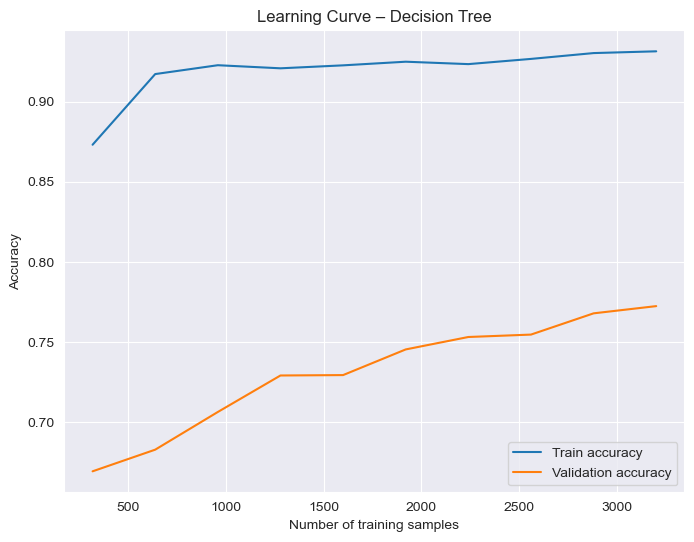

In [360]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Train accuracy")
plt.plot(train_sizes, val_mean, label="Validation accuracy")
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy")
plt.title("Learning Curve – Decision Tree")
plt.legend()
plt.grid(True)
plt.show()


Krzywa walidacji w oparciu o parametr głębokości drzewa

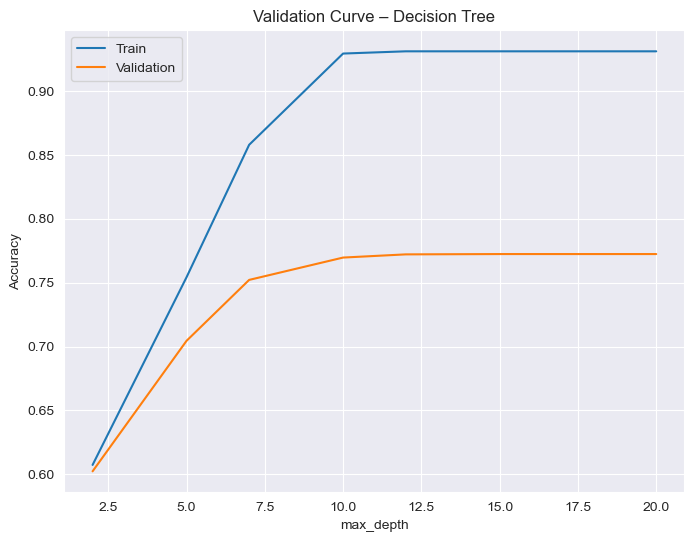

In [361]:
from sklearn.model_selection import validation_curve

param_range = [2,5,7, 10,12,15,18,20]

train_scores, val_scores = validation_curve(
    DecisionTreeClassifier(
        criterion=grid.best_params_["criterion"],
        min_samples_split=grid.best_params_["min_samples_split"],
        min_samples_leaf=grid.best_params_["min_samples_leaf"],
        random_state=42
    ),
    X_train,
    y_train,
    param_name="max_depth",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

plt.figure(figsize=(8, 6))
plt.plot(param_range, train_scores.mean(axis=1), label="Train")
plt.plot(param_range, val_scores.mean(axis=1), label="Validation")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Validation Curve – Decision Tree")
plt.legend()
plt.grid(True)
plt.show()


Drzewo na PCA

In [362]:
y = df["Grade"]
X = df.drop(["Grade","Total_Score", "Department"], axis=1)
dep_dummies = pd.get_dummies(df[['Department']], drop_first=True)
for column in dep_dummies.columns:
    dep_dummies[column] = dep_dummies[column].astype(float)
X = pd.concat([dep_dummies,X], axis=1)

X.head()

,Department_CS,Department_Engineering,Department_Mathematics,Gender,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,0.0,0.0,1.0,0.0,22.0,97.36,40.61,59.61,73.69,53.17,73.4,62.84,10.3,1.0,0.0,2.0,1.0,1.0,5.9
1,0.0,0.0,0.0,1.0,18.0,97.71,57.27,74.00,74.23,98.23,88.0,98.23,27.1,0.0,0.0,1.0,0.0,4.0,4.3
2,0.0,1.0,0.0,1.0,24.0,99.52,41.84,63.85,85.85,50.00,4.7,91.22,12.4,1.0,0.0,1.0,0.0,9.0,6.1
3,0.0,1.0,0.0,0.0,24.0,90.38,45.65,44.44,68.10,66.27,4.2,55.48,25.5,0.0,1.0,1.0,0.0,8.0,4.9
4,1.0,0.0,0.0,0.0,23.0,59.41,53.13,61.77,67.66,83.98,64.3,87.43,13.3,1.0,0.0,2.0,1.0,6.0,4.5


In [363]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

#n_components = len(kaiser_rule)

pca = PCA(n_components=0.9, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_scal)
gs_columns = [f'GS{i+1}' for i in range(X_train_pca.shape[1])]
X_train_pca = pd.DataFrame(X_train_pca, columns=gs_columns)

X_test_pca = pca.transform(X_test_scal)
X_test_pca = pd.DataFrame(X_test_pca, columns=gs_columns)

X_train_pca.head()

,GS1,GS2,GS3,GS4,GS5,GS6,GS7,GS8,GS9,GS10,GS11,GS12,GS13,GS14,GS15,GS16,GS17
0,-1.551256,-1.264238,0.474498,-1.640816,-0.743982,1.485102,-1.290815,-0.705020,-0.978459,0.797696,-0.547322,-0.445339,-0.823433,-1.166585,-0.797125,1.522751,-0.908050
1,0.018983,0.132447,-0.683428,2.272627,0.538942,-1.283100,1.550294,1.268466,-0.502020,-0.391566,-1.225409,0.499029,-0.159584,0.137503,0.183816,0.103797,0.690086
2,-0.307841,1.783361,-1.316066,-0.821907,1.587325,0.795954,-0.799380,-0.234722,-0.145424,-0.771378,0.761436,1.671632,-0.724637,-1.917737,0.419414,0.681179,0.277248
3,-0.322214,2.175540,0.548666,1.333341,-0.774345,0.516781,1.765900,0.825452,-0.527407,-0.040892,1.101982,0.049050,0.764249,-0.218232,-0.236679,1.423904,-1.015042
4,0.072498,-0.004801,-0.494976,1.674382,0.447615,-1.761333,0.220006,0.440253,0.336810,1.400988,-0.815950,1.070749,-1.723306,-0.390976,1.215428,0.191372,-1.221165


In [364]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 10,12,15,20],
    "min_samples_split": [2, 5, 10,20],
    "min_samples_leaf": [1, 2, 5]
}

dt = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train_pca, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [365]:
best_model = grid.best_estimator_

print("Najlepsze parametry:")
print(grid.best_params_)

y_pred = best_model.predict(X_test_pca)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")

print("Classification report:")
print(classification_report(y_test, y_pred))

Najlepsze parametry:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}
Accuracy: 0.6010

Classification report:
              precision    recall  f1-score   support

         1.0       0.48      0.25      0.33        56
         2.0       0.59      0.56      0.57       352
         3.0       0.62      0.71      0.66       461
         4.0       0.56      0.48      0.52       128
         5.0       1.00      0.33      0.50         3

    accuracy                           0.60      1000
   macro avg       0.65      0.47      0.52      1000
weighted avg       0.60      0.60      0.59      1000



W przypadku skorzystania z Kryterium Kaisera doboru ilości składowych do PCA, uzyskane na drzewie decyzyjnym accuracy wynosiło zaledwie 51%. Wybierając 90% wyjaśnionej wariancji przy PCA, uzyskane accuracy przy klasyfikacji nieznacznie się zwiększyło do 60%. Najlepsze wyniki jednak drzewo osiągnęło przy pełnych danych bez redukcji wymiarów.

## Regresja wieloraka

Na pierwszy rzut oka kolumna z wynikami końcowymi studentów Total_Score, która zawiera wyniki w skali od 0-100 rzutowane na ocenę Grade, wygląda jak dosyć dobrze ułożone dane pod kątem regresji wielorakiej. Sprawdźmy, więc działanie regresji i macierz korelacji.

In [367]:
y = df["Total_Score"]
X = df.drop(["Grade","Total_Score", "Department"], axis=1)
dep_dummies = pd.get_dummies(df[['Department']], drop_first=True)
for column in dep_dummies.columns:
    dep_dummies[column] = dep_dummies[column].astype(float)
X = pd.concat([dep_dummies,X], axis=1)
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

X.head()

,Department_CS,Department_Engineering,Department_Mathematics,Gender,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,0.0,0.0,1.0,0.0,22.0,97.36,40.61,59.61,73.69,53.17,73.4,62.84,10.3,1.0,0.0,2.0,1.0,1.0,5.9
1,0.0,0.0,0.0,1.0,18.0,97.71,57.27,74.00,74.23,98.23,88.0,98.23,27.1,0.0,0.0,1.0,0.0,4.0,4.3
2,0.0,1.0,0.0,1.0,24.0,99.52,41.84,63.85,85.85,50.00,4.7,91.22,12.4,1.0,0.0,1.0,0.0,9.0,6.1
3,0.0,1.0,0.0,0.0,24.0,90.38,45.65,44.44,68.10,66.27,4.2,55.48,25.5,0.0,1.0,1.0,0.0,8.0,4.9
4,1.0,0.0,0.0,0.0,23.0,59.41,53.13,61.77,67.66,83.98,64.3,87.43,13.3,1.0,0.0,2.0,1.0,6.0,4.5


Macierz korelacji

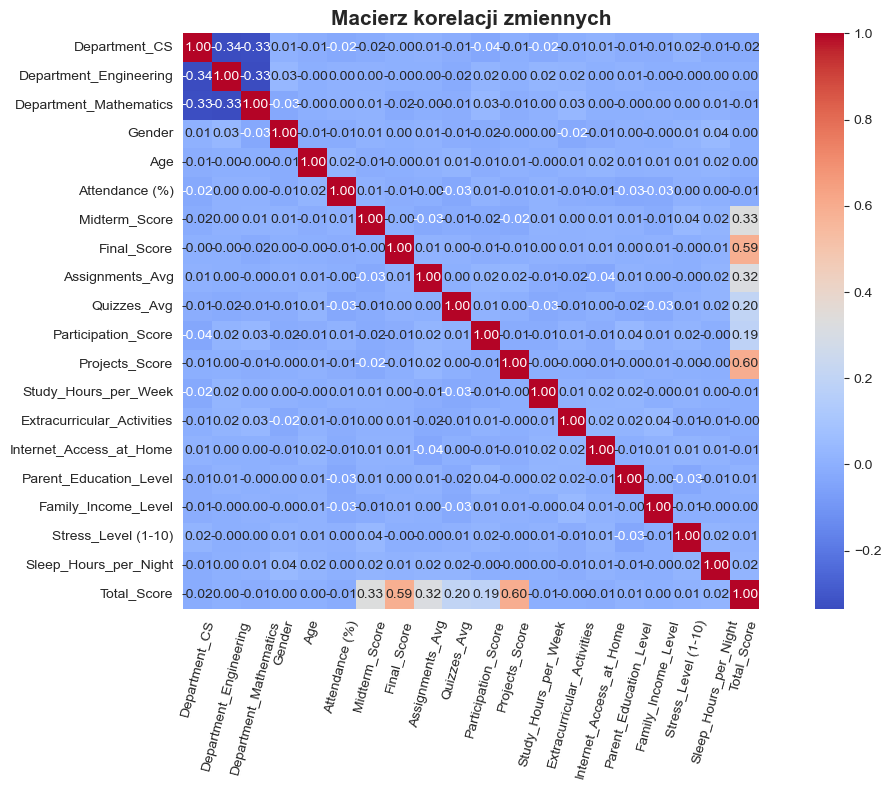

In [368]:
import seaborn as sns

dane = pd.concat([X,y], axis=1)
corr_matrix = dane.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            square=True)
plt.xticks(rotation=75)
plt.title("Macierz korelacji zmiennych", fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

Widzimy, że jest stosunkowo duża korelacja między wynikiem z projektu oraz egzaminu a wynikiem końcowym studenta. Dużą korelację z oceną końcową ma również egzamin śródsemestralny oraz oceny z zadań. Mniejszą korelację z kolei wykazują wyniki z quizów oraz aktywność na zajęciach. Z kolei pozostałe zmienne mają prawie zerową korelację z wynikiem końcowym.

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scal = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scal = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train_scal

,Department_CS,Department_Engineering,Department_Mathematics,Gender,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,1.754272,-0.585819,-0.568112,0.989060,0.987815,0.087984,0.088167,0.098657,1.099847,-1.565679,-0.730951,1.671031,1.083468,1.002002,0.988071,-1.411725,0.016507,-1.219861,0.334847
1,-0.570037,1.707013,-0.568112,0.989060,0.987815,1.017053,-0.198394,-0.198345,-0.426173,-1.607747,-0.115060,-0.286636,0.306199,1.002002,-1.012073,1.398727,1.239281,0.505178,-1.051898
2,-0.570037,-0.585819,-0.568112,-1.011061,1.490200,-0.035381,0.783363,1.596604,-0.999641,1.356318,1.569991,-1.329480,-0.401671,1.002002,0.988071,0.696114,-1.206266,0.850185,-0.289188
3,-0.570037,1.707013,-0.568112,-1.011061,-1.524111,1.657573,-0.338809,-0.378899,-1.402244,0.039799,1.054441,-0.389052,1.097348,1.002002,0.988071,0.696114,0.016507,-1.219861,-1.329247
4,-0.570037,1.707013,-0.568112,-1.011061,1.490200,1.054689,1.470536,0.616204,0.730448,0.835641,-1.440264,1.614979,1.527621,-0.998002,0.988071,-1.411725,0.016507,-0.529846,1.652255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.570037,1.707013,-0.568112,-1.011061,-1.524111,0.793323,0.931801,-0.658257,-1.084727,0.802538,1.445428,-0.064504,-0.193474,-0.998002,0.988071,1.398727,1.239281,-0.874853,0.681533
3996,-0.570037,1.707013,-0.568112,-1.011061,-1.524111,-0.300232,0.696822,0.265095,0.460662,0.541855,1.161703,-1.002164,-1.331618,1.002002,-1.012073,-0.709112,0.016507,-1.564869,0.889545
3997,-0.570037,-0.585819,-0.568112,-1.011061,-1.021726,-0.606901,-1.420862,0.572683,0.434375,-0.331916,1.583831,0.204684,1.555381,-0.998002,0.988071,1.398727,0.016507,-0.874853,0.265510
3998,1.754272,-0.585819,-0.568112,-1.011061,0.987815,-0.091139,1.229251,-0.291857,-0.767210,-0.752595,-0.208482,1.275208,-0.415551,-0.998002,-1.012073,1.398727,-1.206266,-0.529846,1.166894


In [370]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scal, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [371]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_train = model.predict(X_train_scal)
y_pred_test = model.predict(X_test_scal)

r2_train = r2_score(y_train, y_pred_train)
r2_test  = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Intercept:", model.intercept_)
print("R^2 (train):", r2_train)
print("R^2 (test):", r2_test)
print("MSE (train):", mse_train)
print("MSE (test):", mse_test)

Intercept: 71.62668325
R^2 (train): 1.0
R^2 (test): 1.0
MSE (train): 1.3125383285429282e-28
MSE (test): 1.289440481238057e-28


Otrzymaliśmy wyjątkowo dobre dopasowanie

In [372]:
#Współczynniki dla cech

coef_df = pd.DataFrame({
    'feature': list(X_train.columns),
    'coefficient': model.coef_
}).sort_values(by='coefficient', key=abs, ascending=False)

print(coef_df)

                       feature   coefficient
11              Projects_Score  4.335261e+00
7                  Final_Score  4.250817e+00
6                Midterm_Score  2.617246e+00
8              Assignments_Avg  2.168386e+00
9                  Quizzes_Avg  1.450036e+00
10         Participation_Score  1.445060e+00
2       Department_Mathematics  4.466540e-15
1       Department_Engineering -3.529707e-15
5               Attendance (%)  2.551497e-15
4                          Age -1.175318e-15
17         Stress_Level (1-10)  1.070475e-15
0                Department_CS  1.070405e-15
13  Extracurricular_Activities  9.346025e-16
14     Internet_Access_at_Home -7.974147e-16
12        Study_Hours_per_Week -3.835317e-16
15      Parent_Education_Level  3.536747e-16
18       Sleep_Hours_per_Night  3.533387e-16
16         Family_Income_Level  1.240563e-16
3                       Gender  1.195127e-16


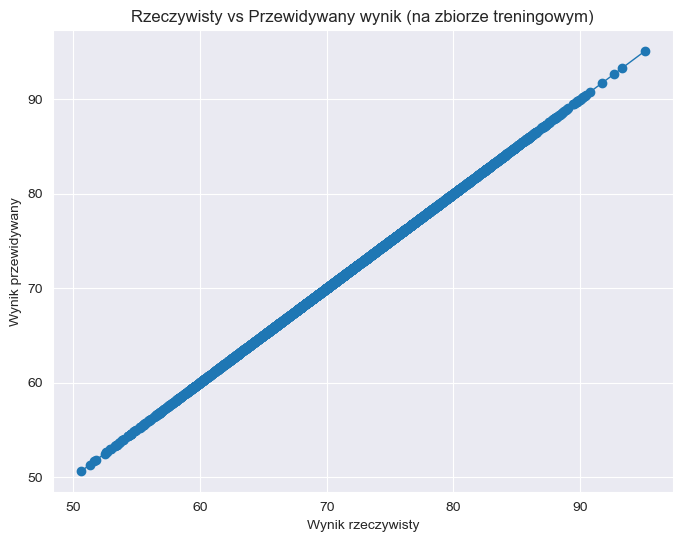

In [373]:
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_pred_train)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], linewidth=1)
plt.xlabel("Wynik rzeczywisty")
plt.ylabel("Wynik przewidywany")
plt.title("Rzeczywisty vs Przewidywany wynik (na zbiorze treningowym)")
plt.grid(True)
plt.show()

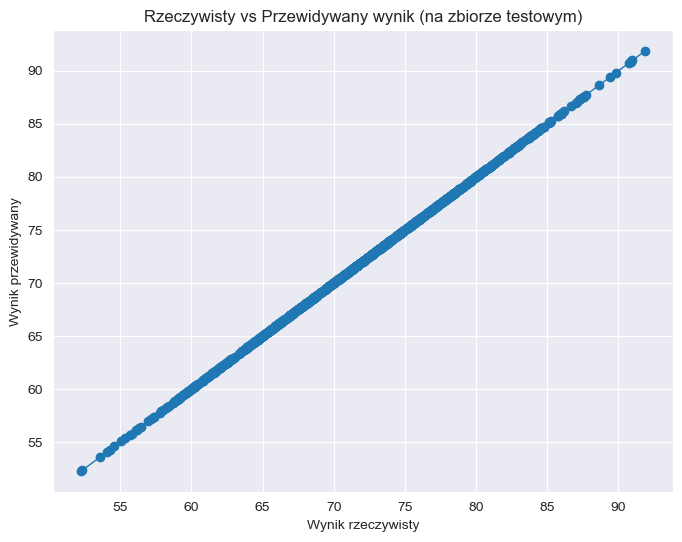

In [374]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linewidth=1)
plt.xlabel("Wynik rzeczywisty")
plt.ylabel("Wynik przewidywany")
plt.title("Rzeczywisty vs Przewidywany wynik (na zbiorze testowym)")
plt.grid(True)
plt.show()

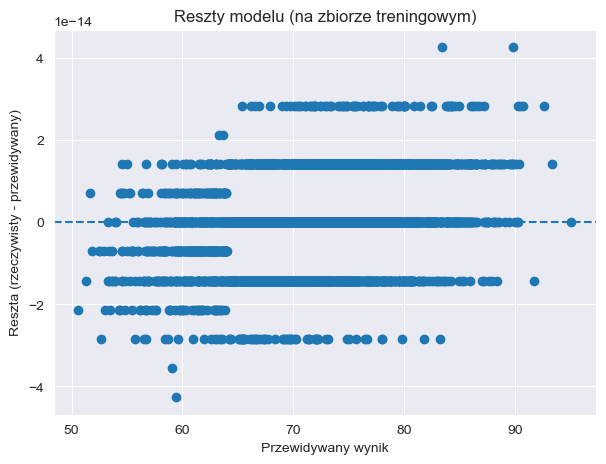

In [375]:
residuals = y_train - y_pred_train
plt.figure(figsize=(7,5))
plt.scatter(y_pred_train, residuals)
plt.axhline(0, linestyle='--')
plt.xlabel("Przewidywany wynik")
plt.ylabel("Reszta (rzeczywisty - przewidywany)")
plt.title("Reszty modelu (na zbiorze treningowym)")
plt.grid(True)
plt.show()

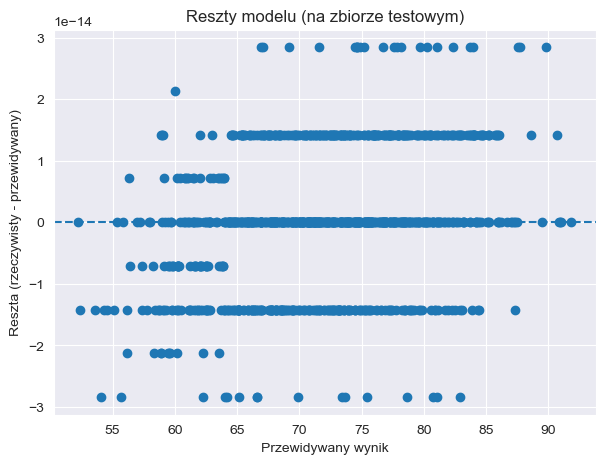

In [376]:
residuals = y_test - y_pred_test
plt.figure(figsize=(7,5))
plt.scatter(y_pred_test, residuals)
plt.axhline(0, linestyle='--')
plt.xlabel("Przewidywany wynik")
plt.ylabel("Reszta (rzeczywisty - przewidywany)")
plt.title("Reszty modelu (na zbiorze testowym)")
plt.grid(True)
plt.show()

Model jak widzimy z wykresów nie ma dopasowania idealnego, jednak jest ono bardzo dobre, co wskazuje na silne liniowe zależności między wynikiem końcowym a poszczególnymi cechami, w szczególności zmiennymi odpowiadającymi za bezpośrednią pracę studenta na zajęciach. Czynniki środowiskowe z kolei nie wpływają znacząco na wynik końcowy studenta.

## Wzorce asocjacyjne

In [16]:
danedoasocj =[]
for i in range(len(dfasocj["Extracurricular_Activities"])):
    danedoasocj.append([dfasocj["Extracurricular_Activities"][i] + "extra", dfasocj["Internet_Access_at_Home"][i] + "internet",dfasocj["Parent_Education_Level"][i],dfasocj["Family_Income_Level"][i],dfasocj["Grade"][i], dfasocj["Gender"][i], dfasocj["Department"][i]])

In [17]:
mlb = MultiLabelBinarizer()
data = mlb.fit_transform(danedoasocj)
transactions_df = pd.DataFrame(data, columns=mlb.classes_)

In [18]:
min_support=0.2

In [19]:
frequent_itemsets = apriori(transactions_df, min_support=min_support, use_colnames=True)
print("zbiory częste: ", frequent_itemsets)

zbiory częste:      support                 itemsets
0    0.2040             (Bachelor's)
1    0.2528               (Business)
2    0.4614                      (C)
3    0.2478                     (CS)
4    0.3520                      (D)
5    0.2548            (Engineering)
6    0.4898                 (Female)
7    0.3278                   (High)
8    0.3374                    (Low)
9    0.5102                   (Male)
10   0.2000               (Master's)
11   0.2446            (Mathematics)
12   0.3348                 (Medium)
13   0.4976                (Noextra)
14   0.4960             (Nointernet)
15   0.2050                   (None)
16   0.2024                    (PhD)
17   0.5024               (Yesextra)
18   0.5040            (Yesinternet)
19   0.2258              (Female, C)
20   0.2356                (C, Male)
21   0.2354             (C, Noextra)
22   0.2240          (C, Nointernet)
23   0.2260            (C, Yesextra)
24   0.2374         (C, Yesinternet)
25   0.2380        (Fe

C:\Users\mz10m\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:175: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


W naszym zbiorze danych można znaleźć duże ilości zbiorów częstych

In [20]:
min_confidence=0.5

In [21]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

In [22]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(C),(Male),0.4614,0.5102,0.2356,0.510620,1.000823,1.0,0.000194,1.000858,0.001527,0.320109,0.000857,0.486200
1,(C),(Noextra),0.4614,0.4976,0.2354,0.510186,1.025294,1.0,0.005807,1.025696,0.045804,0.325318,0.025053,0.491629
2,(C),(Yesinternet),0.4614,0.5040,0.2374,0.514521,1.020875,1.0,0.004854,1.021671,0.037965,0.326099,0.021212,0.492776
3,(Female),(Yesextra),0.4898,0.5024,0.2518,0.514087,1.023263,1.0,0.005724,1.024052,0.044559,0.340086,0.023488,0.507641
4,(Yesextra),(Female),0.5024,0.4898,0.2518,0.501194,1.023263,1.0,0.005724,1.022843,0.045688,0.340086,0.022333,0.507641
5,(Female),(Yesinternet),0.4898,0.5040,0.2496,0.509596,1.011103,1.0,0.002741,1.011410,0.021522,0.335394,0.011282,0.502417
6,(Male),(Noextra),0.5102,0.4976,0.2596,0.508820,1.022548,1.0,0.005724,1.022843,0.045021,0.346966,0.022333,0.515262
7,(Noextra),(Male),0.4976,0.5102,0.2596,0.521704,1.022548,1.0,0.005724,1.024052,0.043892,0.346966,0.023488,0.515262
8,(Male),(Nointernet),0.5102,0.4960,0.2558,0.501372,1.010831,1.0,0.002741,1.010774,0.021876,0.340885,0.010659,0.508549
9,(Nointernet),(Male),0.4960,0.5102,0.2558,0.515726,1.010831,1.0,0.002741,1.011410,0.021259,0.340885,0.011282,0.508549


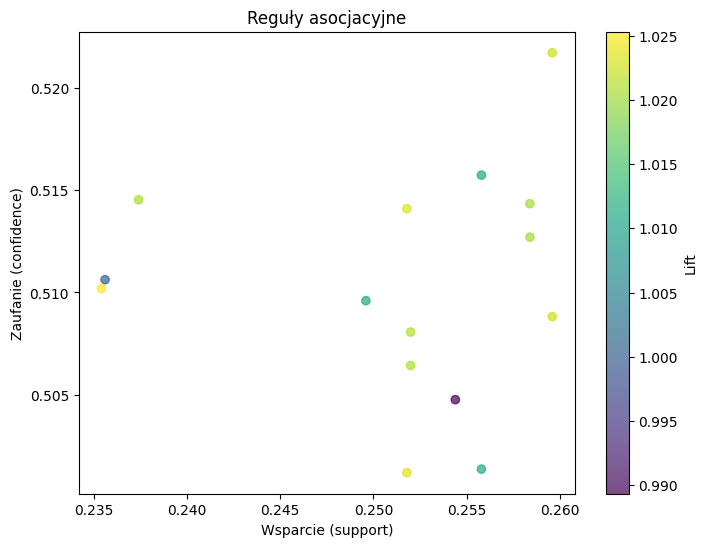

In [23]:
plt.figure(figsize=(8,6))
scatter=plt.scatter(rules["support"], rules["confidence"], c=rules['lift'], cmap="viridis", alpha=0.7)
plt.colorbar(scatter, label="Lift")
plt.xlabel("Wsparcie (support)")
plt.ylabel("Zaufanie (confidence)")
plt.title("Reguły asocjacyjne")
plt.show()

W przypadku reguł asocjacyjnych dużym problemem okazuje się brak reguł o poziomie 0.7 pewności. Za to pozytywną kwestią jest że wszystkie zbiory mają lift powyżej 1 co oznacza że prawdopodobnie nie występują one losowo ze sobą. Przypadki z reguł występują w około 1/4 wszystkich przypadków 